<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Clustering with scikit-learn

<br><br></p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates

%matplotlib inline

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br><br></p>


In [3]:
data = pd.read_csv('D:\python files\pandas exercise\minute_weather.csv')
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [4]:
data.shape

(1587257, 13)

In [5]:
data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Data Sampling<br></p>

Lots of rows, so let us sample down by taking every 10th row. <br>


In [6]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Statistics
<br><br></p>


In [7]:
sampled_df.describe()

,rowID,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
count,1.587260e+05,158726.000000,158726.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158680.000000,158725.000000,158725.000000,158726.000000
mean,7.936250e+05,916.830161,61.851589,162.156100,2.775215,163.462144,3.400558,166.774017,2.134664,0.000318,0.409627,47.609470
std,4.582039e+05,3.051717,11.833569,95.278201,2.057624,92.452139,2.418802,97.441109,1.742113,0.011236,8.665523,26.214409
min,0.000000e+00,905.000000,31.640000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.900000
25%,3.968125e+05,914.800000,52.700000,62.000000,1.300000,68.000000,1.600000,76.000000,0.800000,0.000000,0.000000,24.700000
50%,7.936250e+05,916.700000,62.240000,182.000000,2.200000,187.000000,2.700000,180.000000,1.600000,0.000000,0.000000,44.700000
75%,1.190438e+06,918.700000,70.880000,217.000000,3.800000,223.000000,4.600000,212.000000,3.000000,0.000000,0.000000,68.000000
max,1.587250e+06,929.500000,99.500000,359.000000,31.900000,359.000000,36.000000,359.000000,31.600000,3.120000,2960.000000,93.000000


In [8]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937509,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [9]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [10]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Drop all the Rows with Empty rain_duration and rain_accumulation
<br><br></p>


In [11]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [12]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

How many rows did we drop ?
<br><br></p>


In [13]:
rows_before - rows_after

46

In [14]:
sampled_df.columns

Index([u'rowID', u'hpwren_timestamp', u'air_pressure', u'air_temp',
       u'avg_wind_direction', u'avg_wind_speed', u'max_wind_direction',
       u'max_wind_speed', u'min_wind_direction', u'min_wind_speed',
       u'relative_humidity'],
      dtype='object')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Select Features of Interest for Clustering
<br><br></p>


In [15]:
sampled_df.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,60.5
10,10,2011-09-10 00:10:49,912.3,62.24,144.0,1.2,167.0,1.8,115.0,0.6,38.5
20,20,2011-09-10 00:20:49,912.2,63.32,100.0,2.0,122.0,2.5,91.0,1.5,58.3
30,30,2011-09-10 00:30:49,912.2,62.60,91.0,2.0,103.0,2.4,71.0,1.4,57.9
40,40,2011-09-10 00:40:49,912.2,64.04,81.0,2.6,88.0,2.9,68.0,1.4,57.4


In [16]:
sampled_df.dtypes

rowID                   int64
hpwren_timestamp       object
air_pressure          float64
air_temp              float64
avg_wind_direction    float64
avg_wind_speed        float64
max_wind_direction    float64
max_wind_speed        float64
min_wind_direction    float64
min_wind_speed        float64
relative_humidity     float64
dtype: object

In [19]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 
        'max_wind_speed','relative_humidity']

In [20]:
select_df = sampled_df[features]

In [21]:
select_df.columns

Index([u'air_pressure', u'air_temp', u'avg_wind_direction', u'avg_wind_speed',
       u'max_wind_direction', u'max_wind_speed', u'relative_humidity'],
      dtype='object')

In [22]:
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
60,912.0,64.04,83.0,0.7,101.0,0.9,51.4
70,911.9,64.22,82.0,2.0,97.0,2.4,62.2
80,911.9,61.70,67.0,3.3,70.0,3.5,71.5
90,911.9,61.34,67.0,3.6,75.0,4.2,72.5


In [32]:
select_df.shape

(158680, 7)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Scale the Features using StandardScaler
<br><br></p>


In [23]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ..., 
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [25]:
X.shape

(158680, 7)

In [28]:
X[1008]

array([-0.14103951, -0.7281469 ,  0.23976074, -1.15435202,  0.44929179,
       -1.19917518,  1.6675633 ])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Use k-Means Clustering
<br><br></p>


In [44]:
kmeans = KMeans(n_clusters=12)
print KMeans
model = kmeans.fit(X)
print("model\n", model)

<class 'sklearn.cluster.k_means_.KMeans'>
('model\n', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=12, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

What are the centers of 12 clusters we formed ?
<br><br></p>


In [34]:
centers = model.cluster_centers_
centers

array([[-0.16210962,  0.86316526, -1.31110486, -0.58985237, -1.16677331,
        -0.60515267, -0.64246344],
       [-1.18025097, -0.87559174,  0.44683649,  1.97735883,  0.53872792,
         1.93864268,  0.91362826],
       [-0.2112464 ,  0.6310489 ,  0.40850061,  0.73574613,  0.51660572,
         0.67361283, -0.14961741],
       [ 1.18975567, -0.25527499, -1.15505203,  2.12583581, -1.05347211,
         2.24304435, -1.13422284],
       [ 0.73329544,  0.43188692,  0.28539049, -0.53407351,  0.47313107,
        -0.54028605, -0.77230029],
       [ 0.05947504, -0.78697456, -1.19650939, -0.57098089, -1.04244738,
        -0.58550009,  0.87690833],
       [ 0.13183777,  0.8438239 ,  1.41067391, -0.63837485,  1.67472948,
        -0.589124  , -0.71393477],
       [ 0.25057386, -0.9945686 ,  0.65937956, -0.54722493,  0.85052742,
        -0.52990981,  1.15882957],
       [ 0.23406221,  0.3193414 ,  1.88793197, -0.65189853, -1.55173355,
        -0.57674535, -0.28274153],
       [-0.84012398, -1.1986

In [36]:
centers.shape

(12, 7)

In [37]:
Z = [np.append(A, index) for index, A in enumerate(centers)]
Z

[array([-0.16210962,  0.86316526, -1.31110486, -0.58985237, -1.16677331,
        -0.60515267, -0.64246344,  0.        ]),
 array([-1.18025097, -0.87559174,  0.44683649,  1.97735883,  0.53872792,
         1.93864268,  0.91362826,  1.        ]),
 array([-0.2112464 ,  0.6310489 ,  0.40850061,  0.73574613,  0.51660572,
         0.67361283, -0.14961741,  2.        ]),
 array([ 1.18975567, -0.25527499, -1.15505203,  2.12583581, -1.05347211,
         2.24304435, -1.13422284,  3.        ]),
 array([ 0.73329544,  0.43188692,  0.28539049, -0.53407351,  0.47313107,
        -0.54028605, -0.77230029,  4.        ]),
 array([ 0.05947504, -0.78697456, -1.19650939, -0.57098089, -1.04244738,
        -0.58550009,  0.87690833,  5.        ]),
 array([ 0.13183777,  0.8438239 ,  1.41067391, -0.63837485,  1.67472948,
        -0.589124  , -0.71393477,  6.        ]),
 array([ 0.25057386, -0.9945686 ,  0.65937956, -0.54722493,  0.85052742,
        -0.52990981,  1.15882957,  7.        ]),
 array([ 0.23406221,  0.

<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold"><br>

Plots
<br><br></p>


Let us first create some utility functions which will help us in plotting graphs:

In [38]:
# Function that creates a DataFrame with a column for Cluster Number

def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

In [39]:
# Function that creates Parallel Plots

def parallel_plot(data):
    my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
    plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
    parallel_coordinates(data, 'prediction', color = my_colors, marker='o')

In [40]:
P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,-0.162110,0.863165,-1.311105,-0.589852,-1.166773,-0.605153,-0.642463,0
1,-1.180251,-0.875592,0.446836,1.977359,0.538728,1.938643,0.913628,1
2,-0.211246,0.631049,0.408501,0.735746,0.516606,0.673613,-0.149617,2
3,1.189756,-0.255275,-1.155052,2.125836,-1.053472,2.243044,-1.134223,3
4,0.733295,0.431887,0.285390,-0.534074,0.473131,-0.540286,-0.772300,4
5,0.059475,-0.786975,-1.196509,-0.570981,-1.042447,-0.585500,0.876908,5
6,0.131838,0.843824,1.410674,-0.638375,1.674729,-0.589124,-0.713935,6
7,0.250574,-0.994569,0.659380,-0.547225,0.850527,-0.529910,1.158830,7
8,0.234062,0.319341,1.887932,-0.651899,-1.551734,-0.576745,-0.282742,8
9,-0.840124,-1.198627,0.375174,0.356867,0.473586,0.344786,1.362279,9


# Dry Days

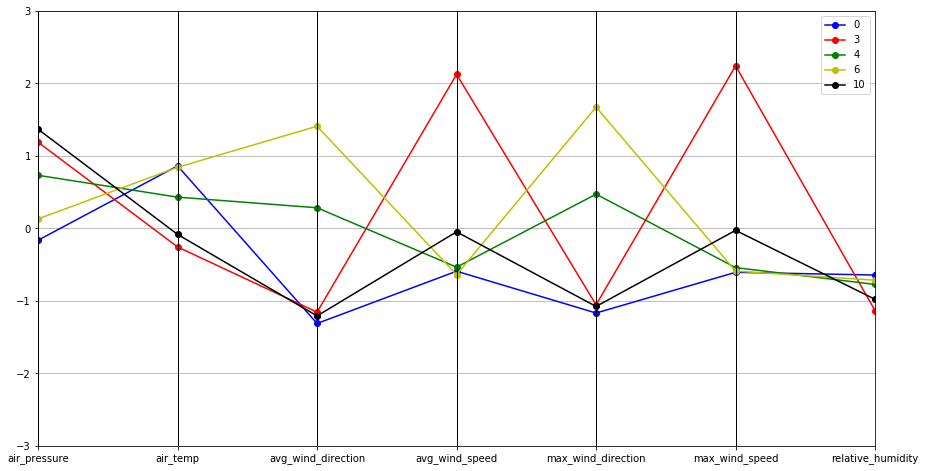

In [41]:
parallel_plot(P[P['relative_humidity'] < -0.5])

# Warm Days

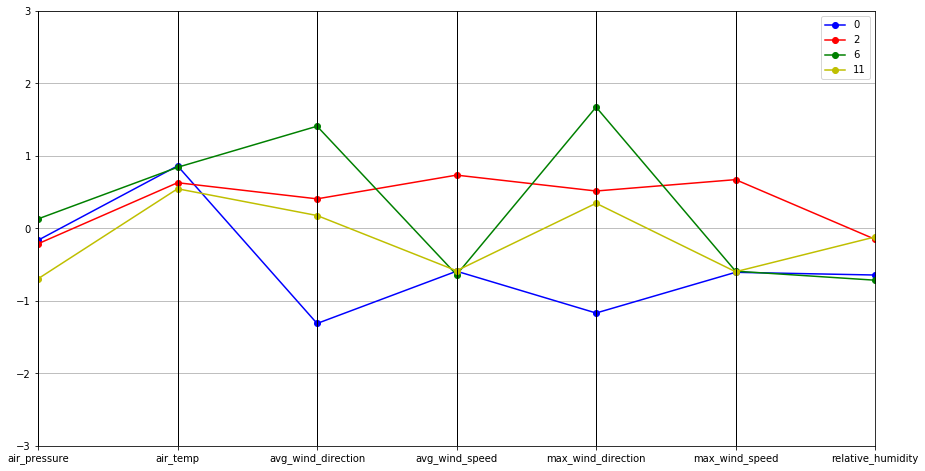

In [42]:
parallel_plot(P[P['air_temp'] > 0.5])

# Cool Days

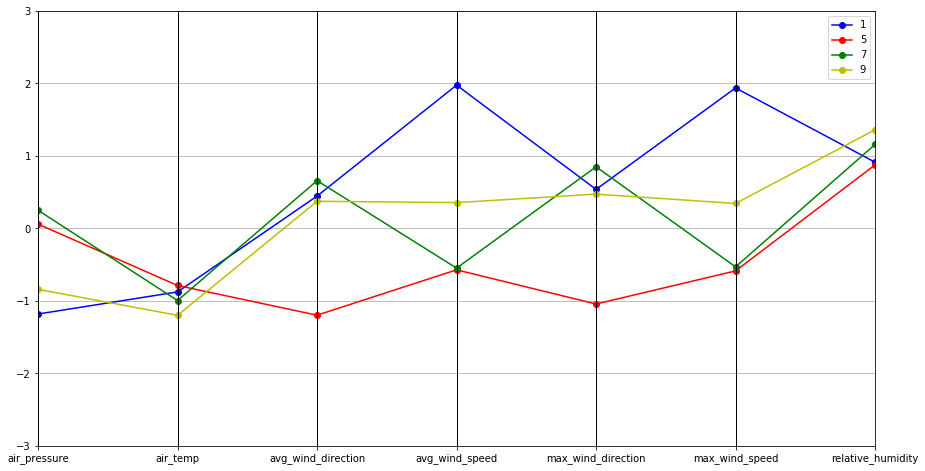

In [43]:
parallel_plot(P[(P['relative_humidity'] > 0.5) & (P['air_temp'] < 0.5)])